# 为什么要使用pandas？
    numpy和pandas都是进行数值型计算，但是numpy只能进行数值型计算，pandas可以进行字符串等类型的计算。

# 1.如何创建series？
<font color = red size = 5>numpy中的大多数方法在对series都适用</font>

    1.s = pd.Series(数据list，index = 索引list）
    不指定index，则默认从0开始指派索引
    2.s = pd.Series(dict)



In [1]:
import pandas as pd
data = [1,3,5,1]

#通过指定索引创建
s0 = pd.Series(data)   #默认索引是从0开始的。。。
print(type(s0))
print(s0)

s1 = pd.Series(data,index = range(4))
print(s1)

index_list = ['apple','orange','pear','peach']
s2 = pd.Series(data,index = index_list)
print(s2)

#通过字典创建，字典的键变成索引，值变成值
serie1 = {'cat':1,'dog':2,'frog':3}
s3 = pd.Series(serie1)
print(s3)
#通过字典创建序列，也可以再对索引进行赋值

<class 'pandas.core.series.Series'>
0    1
1    3
2    5
3    1
dtype: int64
0    1
1    3
2    5
3    1
dtype: int64
apple     1
orange    3
pear      5
peach     1
dtype: int64
cat     1
dog     2
frog    3
dtype: int64


 # 2. series之切片和索引
     可以理解序列的取值为字典与列表的综合，可以通过索引值，数据的位置取值，也可以切片和取间断的单值,也可以通过布尔索引取值。
     
     通过索引的方式只会取出value，而不会取出index；通过切片的方式会取出index和value

In [2]:
import pandas as pd 
data_dict = {'cat':2,'dog':3,'bird':5,'rat':9,'pig':10}
s6 = pd.Series(data_dict)
print(s6['dog'])  #通过索引值取值
print(s6[1])      #通过数据位置取值
print(s6[1:4])    #通过切片取值
print(s6[[1,2,4]])  #通过数据位置的 双层列表取间断的值
print(s6[['rat','cat']])   #通过索引值的 双层列表取间断的值
print(s6[s6>5])      #通过布尔索引取值
         


3
3
dog     3
bird    5
rat     9
dtype: int64
dog      3
bird     5
pig     10
dtype: int64
rat    9
cat    2
dtype: int64
rat     9
pig    10
dtype: int64


## 序列的index和vlaues

In [20]:
import pandas as pd 
data_dict = {'cat':2,'dog':3,'bird':5,'rat':9,'pig':10}

s7 = pd.Series(data_dict)
index_ = s7.index
value_ = s7.values
print(index_,type(index_))   #<class 'pandas.core.indexes.base.Index'>
print(value_,type(value_))   #<class 'numpy.ndarray'>

for i in index_:    #索引是可以遍历的
    print(i)
    
print(index_[1])    #也可以通过索引位置进行取值，与列表类似

Index(['cat', 'dog', 'bird', 'rat', 'pig'], dtype='object') <class 'pandas.core.indexes.base.Index'>
[ 2  3  5  9 10] <class 'numpy.ndarray'>
cat
dog
bird
rat
pig
dog


In [ ]:
# 3.pandas之读取外部数据
    pandas提供了很多方法来读取外部数据，覆盖的数据类型也很广。
    pd.read   按tab键可以查看所有的读取外部数据的方法。

## &emsp;3.1 pd.raed_table(path,sep,header = None) 
    此方法适用于读取txt文件，或者说表格式样的文件
    path：文件所在路径
    sep：指定分隔符形式，sep = ','  sep = '\t'
    header:有没有表头，没表头就赋值None，有表头就制定True或不写

## &emsp;3.2 read_csv(path,sep,header = None)
    语法与read_table相同

# 4. pandas之DataFrame
## &emsp;4.1 基本概念
   <font color = red>DataFrame的构成</font>
   
    由行索引（index），列索引（columns）以及data构成
   <font color = red>如何创建DataFrame</font>  
    
    pd.DataFrame(data,index,columns,dtype)
        其中，data: numpy数组或者是字典，或者是dataframe字典
             index：index类型的数据或者是一个数组类型的数据
             columns： 同index
             dtype： 指定数据的类型
    
    

In [42]:
import pandas as pd
import numpy as np
#通过指定数组，index，columns来创建
data1 = np.arange(12).reshape(3,4)
index1 = ['cat','dog','pig']
columns1 = ['e','f','g','h']
df1 = pd.DataFrame(data,index = index1,columns = columns1)
print(df1)

#通过字典来创建  通过字典来创建DataFrame，key会被传给列索引
data_dict = {'name':['jack','mike','susan'],'age':[15,13,17],'tel':[10010,10086,10011]}
df2 = pd.DataFrame(data_dict)
print(df2)

#维数不同的字典
data_dict1 =[{'age':32,'name':'xiaohong','tel':10010},
            {'name':'xiaowang','tel':10000,},
            {'age':22,'name':'xiaogang'}]
df3 = pd.DataFrame(data_dict1)
print(df3)    #对于缺失的数据，会填充nan以补全

     e  f   g   h
cat  0  1   2   3
dog  4  5   6   7
pig  8  9  10  11
    name  age    tel
0   jack   15  10010
1   mike   13  10086
2  susan   17  10011
    age      name      tel
0  32.0  xiaohong  10010.0
1   NaN  xiaowang  10000.0
2  22.0  xiaogang      NaN


## 4.2 DataFrame常见方法

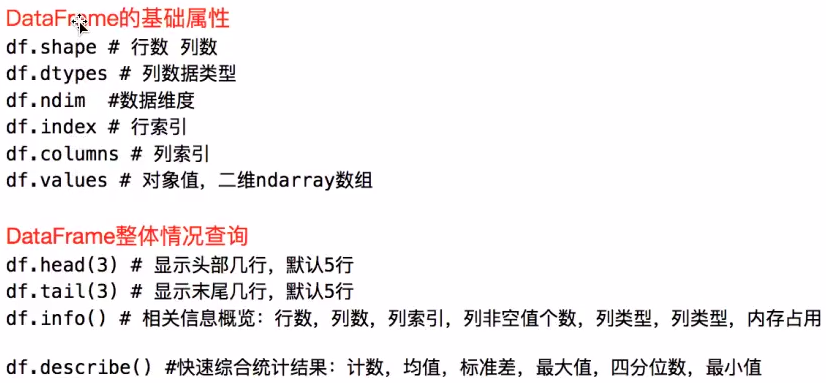

In [43]:
from IPython.display import Image
Image('/home/hui/program/jupyter/file_source/dataframe常见方法.png',width = 700)

## DataFrame的排序方法
    df.sort_values(by = '列标签'，ascending= true/false)
        by：指定按那一列的数据来进行排序（所以dataframe是用每一行来表示一组数据）
        ascending：指定按升序或降序进行排列


## dataframe.insert()：在dataframe中插入列
    dataframe.insert(loc,column,value,allow_duplicates=False)
        loc：插入的列的索引的位置
        column：指定列的列名，必须为不可变对象，如num，str等
        value：插入的这一列的值，int, Series, or array-like
        allow_duplicates = True/False :是否允许插入的列与原dataframe中的相同
    
    
    应用：在处理dataframe数据时，可在前面插入x0这一列，其值全为1，目的是方便hΘ(x)的表示，hΘ(x)=ΘX

# DataFrame的索引切片方法
<font color = red>注意：</font>
    
    df[num]/df[num1:num2] : 中括号里接数字取的是行
    df[str] : 中括号里接的是字符串表示取的是列
    df[num][str]/df[str][num] : 表示取的是两者的交集

# pandas数据提取之loc与iloc
    df.loc通过标签提取数据          切片时左右皆闭
    df.iloc通过位置提取数据         切片时左闭右开

In [56]:
import numpy as np
import pandas as pd
data5 = np.arange(12).reshape(3,4)
df5 = pd.DataFrame(data5,index = list('abc'),columns = list('WXYZ'))
print('df5:','\n',df5)

#通过loc进行数据提取

print(df5.loc['a','W'])         #逗号前表示行，逗号后表示列，a行与W列的交点则为0
print(type(df5.loc['a','W']))    #从dataframe中取出每个数据依然是numpy的基础数据类型
print(df5.loc['a',['W','Z']])   #取同一行的多列
print(type(df5.loc['a',['W','Z']]))    #从dataframe的多列中取出一列，其类型是series类型
print(df5.loc[['a','c'],['W','Z']])  #取出多行多列
print(type(df5.loc[['a','c'],['W','Z']]))    #取出的多行多列其数据类型仍然是dataframe
#loc也可以进行切片操作,并且切片在loc里是两端闭合的
print(df5.loc['a':'c','X':'Z'])
print(df5.loc['b':,'X':])

#通过iloc进行数据提取

#将字符串换成相应的行号与列号，其余均与loc写法相同
#注意：iloc切片时是左闭右开的



df5: 
    W  X   Y   Z
a  0  1   2   3
b  4  5   6   7
c  8  9  10  11
0
<class 'numpy.int64'>
W    0
Z    3
Name: a, dtype: int64
<class 'pandas.core.series.Series'>
   W   Z
a  0   3
c  8  11
<class 'pandas.core.frame.DataFrame'>
   X   Y   Z
a  1   2   3
b  5   6   7
c  9  10  11
   X   Y   Z
b  5   6   7
c  9  10  11


# pandas之布尔索引
    与numpy中的相似

# 5.pandas中缺失数据的处理

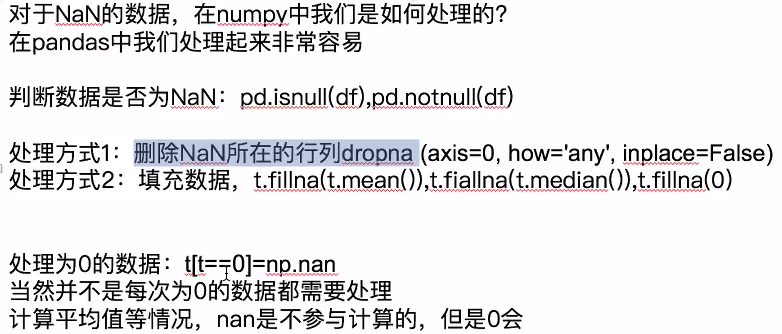

In [58]:
from IPython.display import Image
Image('/home/hui/program/jupyter/file_source/pandas缺失数据的处理.png',width = 700)